# Linear Regression/ KNN / Naive Bayes / SVM

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle


In [21]:
audio_files = glob('/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/*.wav')
# audio_files = glob('https://drive.google.com/drive/folders/15mvUVb15ThHLBFr33sfEhWaQ-uXWt265?usp=sharing')
audio_files

['/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TSI_DIS_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TIE_DIS_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TIE_HAP_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TSI_FEA_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TIE_FEA_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_WSI_DIS_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TIE_NEU_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TSI_NEU_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TSI_HAP_XX.wav',
 '/content/drive/MyDrive/Colab Notebo

## Data Preparation

In [22]:
Crema = '/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/'
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/content/drive/MyDrive/Colab Notebooks/data/Se...
1,disgust,/content/drive/MyDrive/Colab Notebooks/data/Se...
2,happy,/content/drive/MyDrive/Colab Notebooks/data/Se...
3,fear,/content/drive/MyDrive/Colab Notebooks/data/Se...
4,fear,/content/drive/MyDrive/Colab Notebooks/data/Se...


In [23]:
Crema_df.to_csv("Crema_df.csv",index=False)
Crema_df

,Emotions,Path
0,disgust,/content/drive/MyDrive/Colab Notebooks/data/Se...
1,disgust,/content/drive/MyDrive/Colab Notebooks/data/Se...
2,happy,/content/drive/MyDrive/Colab Notebooks/data/Se...
3,fear,/content/drive/MyDrive/Colab Notebooks/data/Se...
4,fear,/content/drive/MyDrive/Colab Notebooks/data/Se...
...,...,...
7446,sad,/content/drive/MyDrive/Colab Notebooks/data/Se...
7447,neutral,/content/drive/MyDrive/Colab Notebooks/data/Se...
7448,happy,/content/drive/MyDrive/Colab Notebooks/data/Se...
7449,angry,/content/drive/MyDrive/Colab Notebooks/data/Se...


In [24]:
Crema_df["Emotions"].value_counts()

disgust    1273
happy      1273
fear       1273
sad        1272
angry      1272
neutral    1088
Name: Emotions, dtype: int64

In [25]:
path = np.array(Crema_df.Path[Crema_df.Emotions=='fear'])[1]
path

'/content/drive/MyDrive/Colab Notebooks/data/SentimentAnalysisDataset/NoiseAudioWAV/1079_TIE_FEA_XX.wav'

In [26]:
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Function to extract features from audio files
def extract_features(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)
    
    # Extract features
    features = []
    
    # Example feature extraction (MFCC)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    features.append(np.mean(mfcc))
    features.append(np.std(mfcc))
    
    return features

# Extract features and create feature matrix X
X = np.array([extract_features(file) for file in audio_files])

# Create target variable y
y = (Crema_df.Emotions).to_numpy()

### Logistic Regression Model

Accuracy: 0.3534540576794098
Precision: 0.28261780647153245
Recall: 0.3534540576794098
F1 Score: 0.2998105957929772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


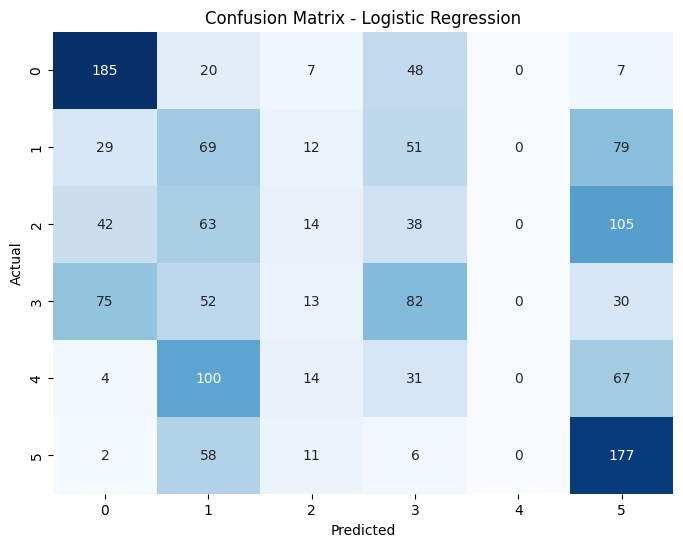

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

       angry       0.55      0.69      0.61       267
     disgust       0.19      0.29      0.23       240
        fear       0.20      0.05      0.08       262
       happy       0.32      0.33      0.32       252
     neutral       1.00      0.00      0.00       216
         sad       0.38      0.70      0.49       254

    accuracy                           0.35      1491
   macro avg       0.44      0.34      0.29      1491
weighted avg       0.43      0.35      0.30      1491



In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a feature scaler
scaler = StandardScaler()

# Scale the feature matrix X
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


# Predict labels for the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy:", accuracy)

# Compute precision and recall scores
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print precision and recall scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)

# Classification report for Logistic Regression
classification_report_lr = classification_report(y_test, y_pred, zero_division=1)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print classification report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report_lr)

### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    
    features = []
    
    # Fourier Transform
    spectrum = np.abs(librosa.stft(audio))
    features.extend(np.mean(spectrum, axis=1))
    features.extend(np.std(spectrum, axis=1))
    
    # Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    features.extend(np.mean(mfcc, axis=1))
    features.extend(np.std(mfcc, axis=1))
    
    # Melspectrogram
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    features.extend(np.mean(melspectrogram, axis=1))
    features.extend(np.std(melspectrogram, axis=1))
    
    # Chromagram
    chromagram = librosa.feature.chroma_stft(y=audio, sr=sr)
    features.extend(np.mean(chromagram, axis=1))
    features.extend(np.std(chromagram, axis=1))
    
    # # Bicoherence
    # bicoherence = librosa.feature.spectral_bicoherence(y=audio, sr=sr)
    # features.extend(np.mean(bicoherence, axis=(0, 1)))
    # features.extend(np.var(bicoherence, axis=(0, 1)))
    # features.extend(np.mean(np.abs(bicoherence), axis=(0, 1)))
    # features.extend(np.std(np.abs(bicoherence), axis=(0, 1)))
    
    # Spectral centroid
    centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    features.append(np.mean(centroid))
    
    # Spectral bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    features.append(np.max(bandwidth) - np.min(bandwidth))
    
    # Spectral contrast
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    features.append(np.mean(contrast))
    
    return features


# Extract features and create feature matr  ix X
X = np.array([extract_features(file) for file in audio_files])

# Create target variable y
y = (Crema_df.Emotions).to_numpy()


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict labels for the test set
y_pred = knn.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision and recall scores
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print precision and recall scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.3085177733065057
Precision: 0.3103670638315348
Recall: 0.3085177733065057
F1 Score: 0.3064791936847137


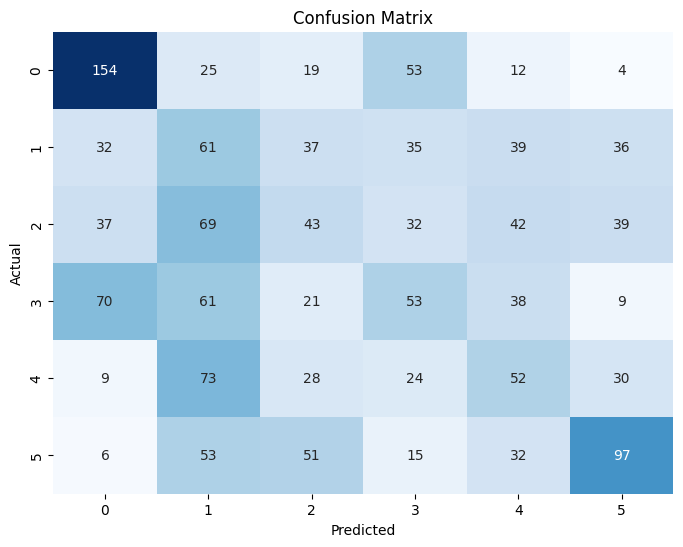

Classification Report:
              precision    recall  f1-score   support

       angry       0.50      0.58      0.54       267
     disgust       0.18      0.25      0.21       240
        fear       0.22      0.16      0.19       262
       happy       0.25      0.21      0.23       252
     neutral       0.24      0.24      0.24       216
         sad       0.45      0.38      0.41       254

    accuracy                           0.31      1491
   macro avg       0.31      0.30      0.30      1491
weighted avg       0.31      0.31      0.31      1491



In [30]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)


### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

# Using the same Training/Testing data From KNN
# Initialize Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Predict labels for the test set
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision and recall scores
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print precision and recall scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.34674714956405095
Precision: 0.311980101873198
Recall: 0.34674714956405095
F1 Score: 0.2986640160419438


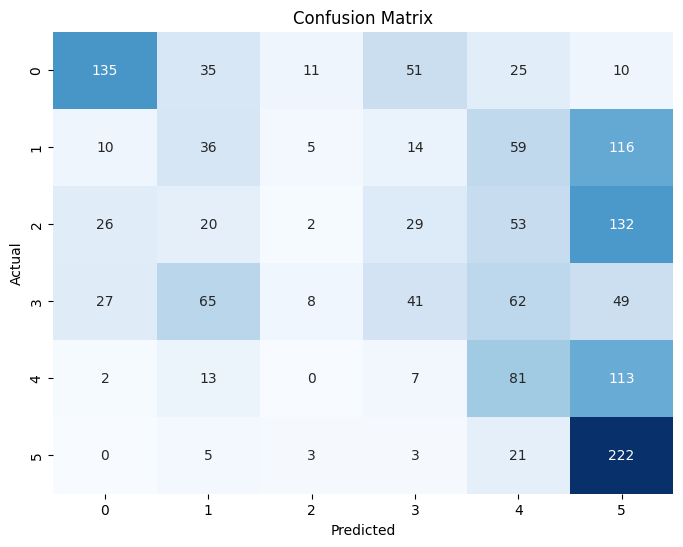

Classification Report:
              precision    recall  f1-score   support

       angry       0.68      0.51      0.58       267
     disgust       0.21      0.15      0.17       240
        fear       0.07      0.01      0.01       262
       happy       0.28      0.16      0.21       252
     neutral       0.27      0.38      0.31       216
         sad       0.35      0.87      0.50       254

    accuracy                           0.35      1491
   macro avg       0.31      0.35      0.30      1491
weighted avg       0.31      0.35      0.30      1491



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


### SVM

In [33]:
from sklearn.svm import SVC

svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision and recall scores
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print precision and recall scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.35479543930248153
Precision: 0.33261932915812126
Recall: 0.35479543930248153
F1 Score: 0.3213061694715097


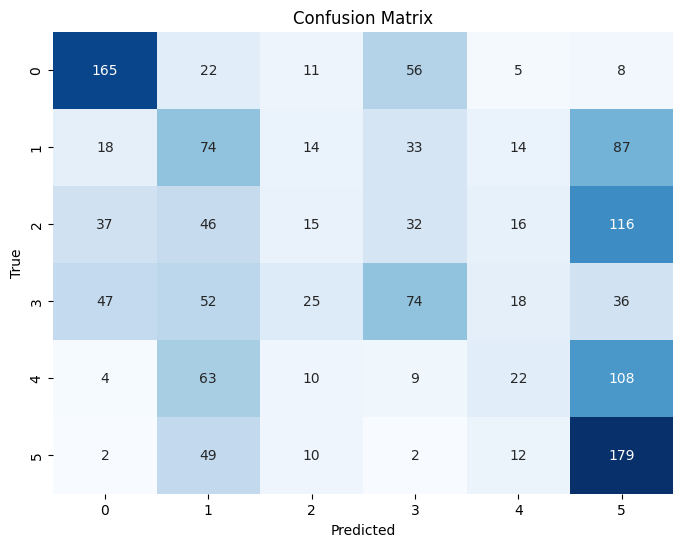

Classification Report:
              precision    recall  f1-score   support

       angry       0.60      0.62      0.61       267
     disgust       0.24      0.31      0.27       240
        fear       0.18      0.06      0.09       262
       happy       0.36      0.29      0.32       252
     neutral       0.25      0.10      0.15       216
         sad       0.34      0.70      0.45       254

    accuracy                           0.35      1491
   macro avg       0.33      0.35      0.32      1491
weighted avg       0.33      0.35      0.32      1491



In [34]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create classification report
report = classification_report(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(report)
